<a href="https://colab.research.google.com/github/vijay-robot/YOLOv3/blob/master/Yolo3_Murtaza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import urllib.request 
from scipy import ndimage # multidimensional image processing
from skimage.color import rgb2hsv # image processing algorithms 
from google.colab.patches import cv2_imshow


In [9]:
classesFile = '/content/sample_data/coco_class.txt'
classNames = []
with open(classesFile, 'rt') as f:
  classNames = f.read().rstrip('\n').split('\n')
print(classNames)
print(len(classNames))
whT=320
confThreshold = 0.4

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [95]:
# url = 'https://github.com/vijay-robot/darknet/blob/master/cfg/yolov3-tiny.cfg'
# urllib.request.urlretrieve(url, '/content/sample_data/yolov3-tiny.cfg')
#!wget -L 'https://github.com/vijay-robot/darknet/blob/master/cfg/yolov3-tiny.cfg'

In [3]:
modelConfiguration = '/content/sample_data/yolov3t_custom_cfg.txt'
modelWeights = '/content/sample_data/yolov3.weights'
net = cv2.dnn.readNetFromDarknet(modelConfiguration,modelWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)


(102, 79, 3)


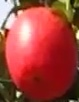

(1, 3, 320, 320)
['yolo_82', 'yolo_94', 'yolo_106']
['yolo_82', 'yolo_94', 'yolo_106']
(300, 85)
(1200, 85)
(4800, 85)
[0.35    0.35    0.4875  0.61875 0.5     0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.     ]


In [20]:
img = cv2.imread('/content/sample_data/testset1_940cluster_0.jpg')
print(img.shape)
blob = cv2.dnn.blobFromImage(img,1/255,(whT,whT),[0,0,0],1,crop=False)  #need to send blob as the input
cv2_imshow(img)
cv2.waitKey(1)
net.setInput(blob)
print(blob.shape)

layerNames =net.getLayerNames()
#print(layerNames) for i in 
outputNames = [layerNames[i[0]-1] for i in net.getUnconnectedOutLayers()]  #to print out layer names using a loop
print(outputNames)
#print(net.getUnconnectedOutLayers())
print(net.getUnconnectedOutLayersNames())  #same as the loop
outputs =net.forward(outputNames)  #forwards the output names from the model 
# print(len(outputs))   # to check that there are 3 output layers
print(outputs[0].shape)   # we get 300x85  rows x columns, what is 85?? should be 80 classes
print(outputs[1].shape)   # we get 1200x85
print(outputs[2].shape)   # we get 4800x85
print((outputs[0][100]))


In [16]:
def findObjects(outputs,img):
  hT,wT,cT = img.shape
  bbox = []
  classIds = []
  confs =[]

  for output in outputs:
    for det in output:
      scores = det[5:]
      classId = np.argmax(scores)
      confidence = scores[classId]
      if confidence > confThreshold:
        w,h = int(det[2]*wT),int(det[3]*hT)
        x,y = int((det[0]*wT - w/2)),int((det[1]*hT)-h/2)
        bbox.append([x,y,w,h])
        classIds.append(classId)
        confs.append(float(confidence))
  print(len(bbox)) 


In [17]:
findObjects(outputs,img)
hT,wT,cT = img.shape
print(hT,wT,cT)

0
236 465 3
